<a href="https://colab.research.google.com/github/annasysoeva/Computational-Linguistics/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bag-of-Words

In [16]:
!pip install gensim

In [17]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint

In [18]:
# Данные для примера
documents = [
    "кошка сидит на ковре",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("Исходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

Исходные документы:
1. кошка сидит на ковре
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат


In [19]:
# Токенизация
tokenized_docs = [doc.lower().split() for doc in documents]
print("Токенизированные документы:")
pprint(tokenized_docs)

Токенизированные документы:
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]


In [20]:
# Создание словаря
dictionary = corpora.Dictionary(tokenized_docs)
print(f"Словарь: {dictionary.token2id}")

Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}


In [21]:
dictionary.token2id

{'ковре': 0,
 'кошка': 1,
 'на': 2,
 'сидит': 3,
 'бегает': 4,
 'двору': 5,
 'по': 6,
 'собака': 7,
 'играет': 8,
 'с': 9,
 'собакой': 10,
 'в': 11,
 'высоко': 12,
 'летит': 13,
 'небе': 14,
 'птица': 15,
 'дружат': 16,
 'и': 17}

In [22]:
# Создание Bag-of-Words представления
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("Bag-of-Words векторы (индекс_слова: частота):")
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")

Bag-of-Words векторы (индекс_слова: частота):
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]


```
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]
 ```

```
Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}
```

In [23]:
# Преобразование в плотные векторы для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)
print("Плотные векторы Bag-of-Words:")
print("Слова:", list(dictionary.token2id.keys()))
for i, vec in enumerate(dense_vectors, 1):
    print(f"Док {i}: {vec}")

Плотные векторы Bag-of-Words:
Слова: ['ковре', 'кошка', 'на', 'сидит', 'бегает', 'двору', 'по', 'собака', 'играет', 'с', 'собакой', 'в', 'высоко', 'летит', 'небе', 'птица', 'дружат', 'и']
Док 1: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 2: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 3: [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Док 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
Док 5: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


```
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]
```

Matrix shape: (5, 18)


Text(0.5, 36.72222222222221, 'Words')

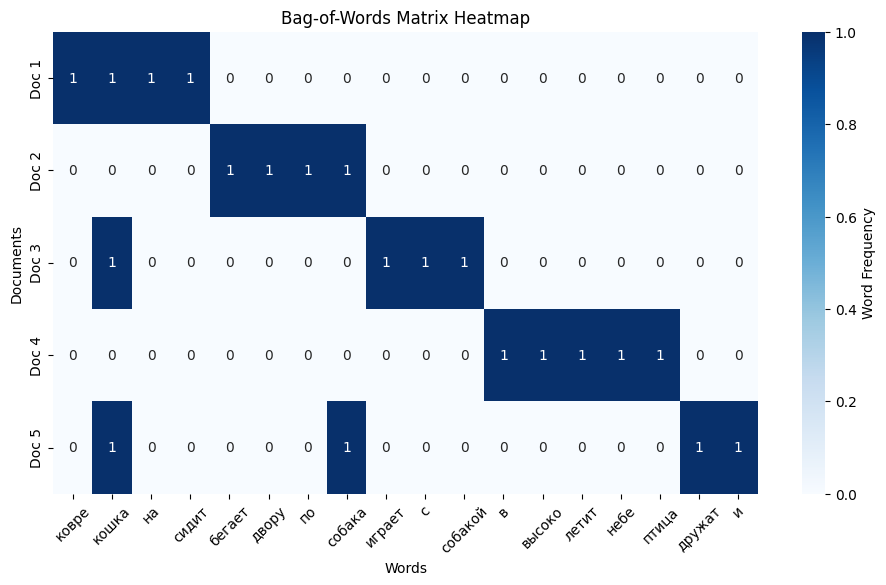

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
matrix = np.array(dense_vectors)
words = list(dictionary.token2id.keys())
doc_names = [f"Doc {i+1}" for i in range(len(documents))]

print(f"Matrix shape: {matrix.shape}")

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')


### TF-IDF

In [25]:
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (индекс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")

TF-IDF векторы (индекс_слова: tfidf_вес):
Документ 1: [('ковре', np.float64(0.568)), ('кошка', np.float64(0.18)), ('на', np.float64(0.568)), ('сидит', np.float64(0.568))]
Документ 2: [('бегает', np.float64(0.548)), ('двору', np.float64(0.548)), ('по', np.float64(0.548)), ('собака', np.float64(0.312))]
Документ 3: [('кошка', np.float64(0.18)), ('играет', np.float64(0.568)), ('с', np.float64(0.568)), ('собакой', np.float64(0.568))]
Документ 4: [('в', np.float64(0.447)), ('высоко', np.float64(0.447)), ('летит', np.float64(0.447)), ('небе', np.float64(0.447)), ('птица', np.float64(0.447))]
Документ 5: [('кошка', np.float64(0.204)), ('собака', np.float64(0.366)), ('дружат', np.float64(0.642)), ('и', np.float64(0.642))]


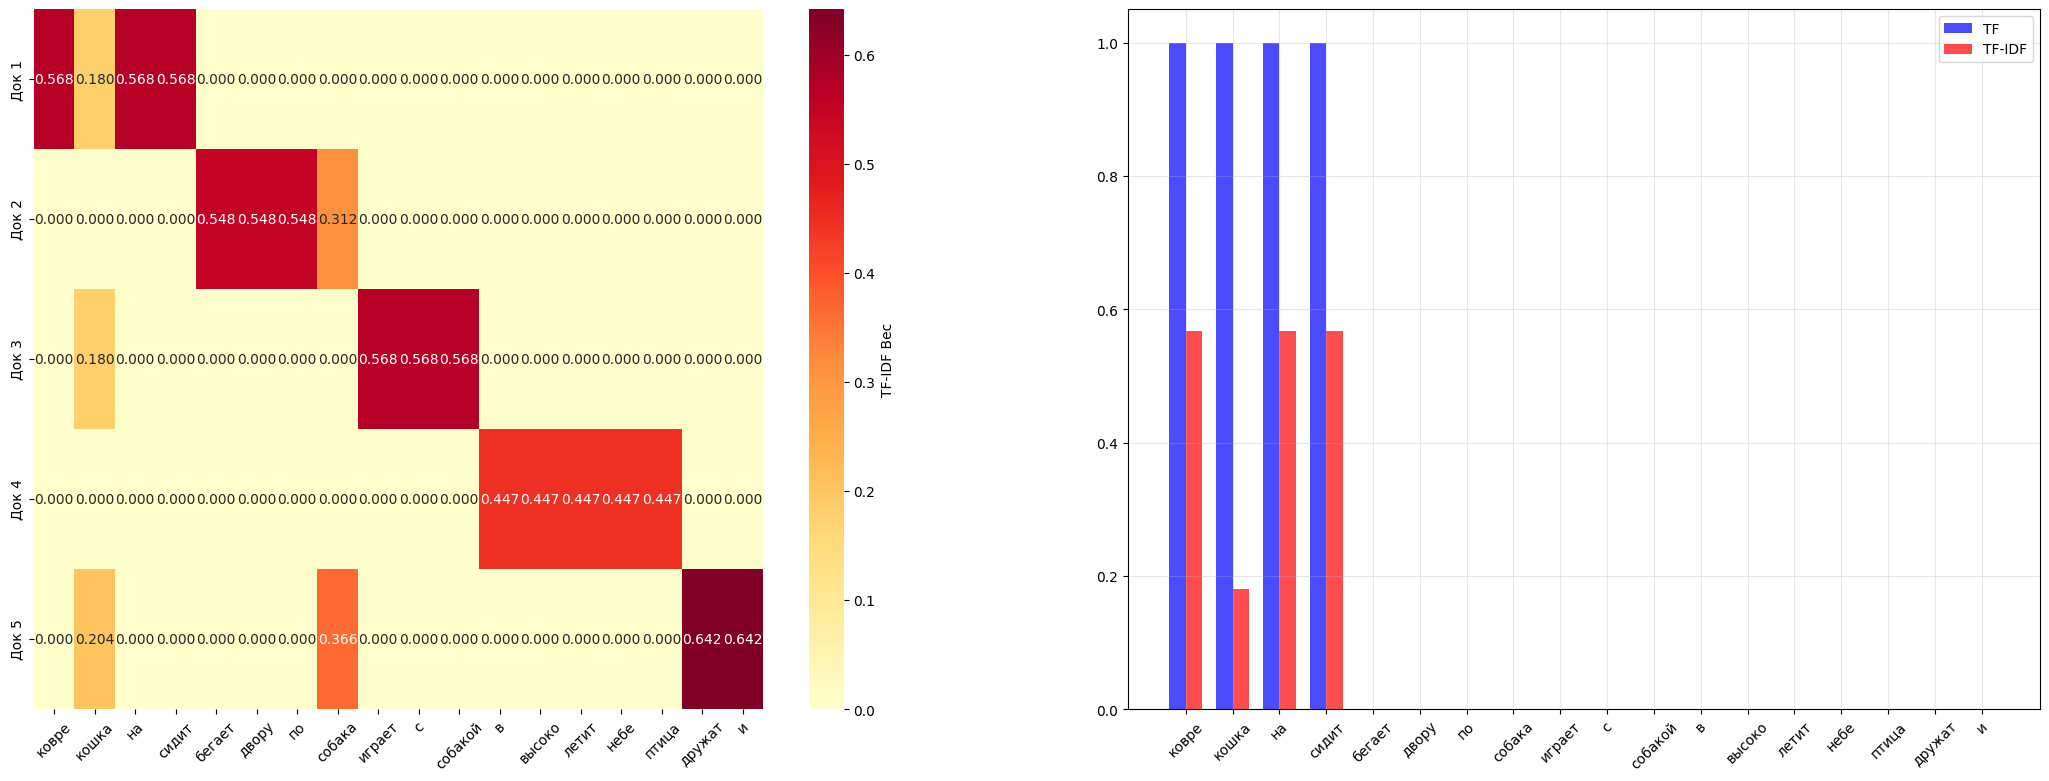

In [26]:
# Преобразуем TF-IDF в плотную матрицу для визуализации
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)
words = list(dictionary.token2id.keys())
doc_names = [f"Док {i+1}" for i in range(len(tfidf_corpus))]

plt.figure(figsize=(40, 20))

plt.subplot(2, 3, 1)
sns.heatmap(tfidf_matrix,
            annot=True,
            fmt='.3f',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
# Получаем исходные TF значения из bow_corpus
tf_dense = bow_to_dense(bow_corpus, dictionary)
tf_matrix = np.array(tf_dense)

# Сравниваем TF и TF-IDF для первого документа
doc_idx = 0
x_pos = np.arange(len(words))
width = 0.35

plt.bar(x_pos - width/2, tf_matrix[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_matrix[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, words, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

#### **1. TF (Term Frequency) - Частота термина**
```python
TF(t,d) = count(t,d) / total_terms(d)
```
или упрощенно:
```python
TF(t,d) = count(t,d)  # просто количество вхождений
```

#### **2. IDF (Inverse Document Frequency) - Обратная частота документа**
```python
IDF(t) = log( N / (DF(t) + 1) ) + 1
```
Где:
- **N** - общее количество документов
- **DF(t)** - количество документов, содержащих слово t
- **+1** в знаменателе - сглаживание, чтобы не было "околонулевых" значений (smoothing)
- **+1** в конце - для избежания нулевых весов

#### **3. TF-IDF - итоговый вес**
```python
TF-IDF(t,d) = TF(t,d) × IDF(t)
```

**Сравнение разных формул IDF**

| Формула | Редкое слово (DF=1) | Частое слово (DF=100) | Сверхчастое (DF=990) |
|---------|---------------------|----------------------|---------------------|
| `log(N/DF)` | 6.91 | 2.30 | 0.01 |
| `log(N/(DF+1))` | 6.90 | 2.29 | 0.009 |
| `log(N/(DF+1)) + 1` | **7.90** | **3.29** | **1.009** |


### Word2Vec

In [27]:
# Используем небольшую модель для демонстрации
print("Загрузка предобученной модели Word2Vec...")
w2v_model = api.load("glove-wiki-gigaword-50")  # Маленькая модель

# Функция для получения эмбеддинга документа
def get_doc_embedding(tokens, model):
    word_vectors = []
    for token in tokens:
        try:
            word_vectors.append(model[token])
        except KeyError:
            continue
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Получаем эмбеддинги для документов
doc_embeddings = []
for i, tokens in enumerate(tokenized_docs):
    embedding = get_doc_embedding(tokens, w2v_model)
    doc_embeddings.append(embedding)
    print(f"\nДокумент {i+1}: {documents[i]}")
    print(f"Эмбеддинг (первые 10 значений): {embedding[:10].round(4)}")
    print(f"Размер: {embedding.shape}")

# Косинусная схожесть между документами
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(doc_embeddings)
print("\nМатрица косинусной схожести:")
print("     Д1    Д2    Д3    Д4    Д5")
for i, row in enumerate(similarity_matrix):
    print(f"Д{i+1}  " + "  ".join([f"{x:.3f}" for x in row]))

Загрузка предобученной модели Word2Vec...

Документ 1: кошка сидит на ковре
Эмбеддинг (первые 10 значений): [-1.3191  1.5595  0.0702 -0.4633 -0.8065  0.3126  1.2403 -0.6641 -1.1753
 -0.4418]
Размер: (50,)

Документ 2: собака бегает по двору
Эмбеддинг (первые 10 значений): [-1.1564  0.7363 -0.162  -0.0846 -0.9603  0.3709  1.9096  0.0091 -0.388
 -0.8261]
Размер: (50,)

Документ 3: кошка играет с собакой
Эмбеддинг (первые 10 значений): [-1.5624  0.9866  0.1836 -1.0273 -0.8551 -0.0476  1.141  -0.6877 -0.2825
 -0.7102]
Размер: (50,)

Документ 4: птица летит высоко в небе
Эмбеддинг (первые 10 значений): [-1.0499  1.3412 -0.3431 -0.8776 -1.2784  0.1292  1.812  -0.3816 -0.9911
 -0.2818]
Размер: (50,)

Документ 5: собака и кошка дружат
Эмбеддинг (первые 10 значений): [-0.9957  1.3808 -0.3036 -0.7568 -0.9025  0.2521  1.4351 -0.4907 -1.3925
 -0.1646]
Размер: (50,)

Матрица косинусной схожести:
     Д1    Д2    Д3    Д4    Д5
Д1  1.000  0.856  0.811  0.873  0.873
Д2  0.856  1.000  0.784  0.859  0.

*Как работает Word2Vec мы разберем на следующей лекции..*

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [11]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-03 18:13:13--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 100.42K  --.-KB/s    in 0.01s   

2025-11-03 18:13:13 (6.69 MB/s) - ‘test.csv’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [15]:
import pandas as pd

# Загрузка CSV-файла
df = pd.read_csv('/content/test.csv')

# Извлекаем столбец с текстами (предположим, что столбец называется "text")
# Если название столбца другое, замените 'text' на соответствующее имя
texts = df['text'].tolist()

# Выводим первые 10 строк для проверки
print(texts[:10])

['Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman ', '#latestnews 4 #newmexico #politics + #nativeamerican + #Israel + #Palestine  -  Protesting Rise Of Alt-Right At... ', '@user You are a stand up guy and a Gentleman Vice President Pence ', "@user @user @user Looks like Flynn isn't too pleased with me, he blocked me. You blocked by Flynn too @user ", 'perfect pussy clips #vanessa hudgens zac efron naked ', "i'm not even catholic, but pope francis is my dude. like i just need him to hug me and tell me everything is okay. ", '@user for al the crying you do about how middle America is left out-they have twice as much voting power ', 'Sentinel Editorial: FBI’s Comey ‘had no one of middle class families. ', 'Samsung to Bring Android 7.0 Nougat to Galaxy S6, S6 edge, Note 5, and Tab S2 - Softpedia News ', 'Israel deems comatose Gaza man who needs treatment in West Bank  a security threat. #Palestine  via @user ']


3. Извлечь столбец с текстами (макс. балл == 1)

In [14]:
import pandas as pd

# Загрузка CSV-файла
df = pd.read_csv('/content/test.csv')

# Извлекаем столбец с текстами (предположим, что столбец называется "text")
# Если название столбца другое, замените 'text' на соответствующее имя
texts = df['text'].tolist()

# Выводим первые 10 строк для проверки
print(texts[:10])

['Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman ', '#latestnews 4 #newmexico #politics + #nativeamerican + #Israel + #Palestine  -  Protesting Rise Of Alt-Right At... ', '@user You are a stand up guy and a Gentleman Vice President Pence ', "@user @user @user Looks like Flynn isn't too pleased with me, he blocked me. You blocked by Flynn too @user ", 'perfect pussy clips #vanessa hudgens zac efron naked ', "i'm not even catholic, but pope francis is my dude. like i just need him to hug me and tell me everything is okay. ", '@user for al the crying you do about how middle America is left out-they have twice as much voting power ', 'Sentinel Editorial: FBI’s Comey ‘had no one of middle class families. ', 'Samsung to Bring Android 7.0 Nougat to Galaxy S6, S6 edge, Note 5, and Tab S2 - Softpedia News ', 'Israel deems comatose Gaza man who needs treatment in West Bank  a security threat. #Palestine  via @user ']


4. Построить Bag-of-Words (макс. балл == 3)

Top 50 words by frequency:
      word  frequency
0     user        570
1      the        385
2       to        267
3        a        225
4       of        199
5       is        186
6      for        176
7       in        164
8      and        163
9        i        133
10      on        118
11     you         92
12    this         80
13      it         79
14    that         79
15    with         71
16     are         65
17   trump         60
18      be         59
19     not         59
20      as         54
21      my         51
22    have         51
23    just         50
24    from         47
25      at         47
26      so         45
27     was         43
28      by         43
29      we         43
30     how         41
31   about         40
32     can         39
33     all         39
34    your         35
35      he         34
36     its         34
37  people         34
38     has         34
39    they         33
40      im         32
41    will         32
42      up         31
43   

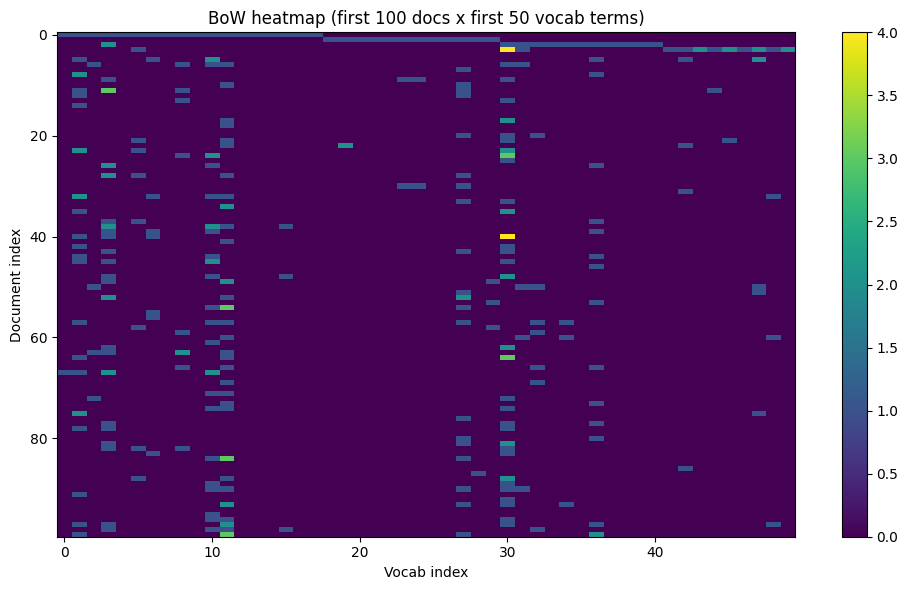

Top 20 most frequent words:
     word  frequency
0    user        570
1     the        385
2      to        267
3       a        225
4      of        199
5      is        186
6     for        176
7      in        164
8     and        163
9       i        133
10     on        118
11    you         92
12   this         80
13     it         79
14   that         79
15   with         71
16    are         65
17  trump         60
18     be         59
19    not         59


In [28]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

# Загрузка CSV-файла
df = pd.read_csv('/content/test.csv')

# Извлекаем столбец с текстами (предположим, что столбец называется "text")
texts = df['text'].astype(str).tolist()

# Шаг 1: Приведение текста к нижнему регистру и удаление знаков препинания
punct_trans = str.maketrans("", "", string.punctuation)

def preprocess(text):
    text = text.lower()
    text = text.translate(punct_trans)
    text = re.sub(r"\s+", " ", text).strip()
    return text

processed_texts = [preprocess(t) for t in texts]

# Шаг 2: Токенизация (разбиение на слова)
tokenized_texts = [t.split() for t in processed_texts]

# Шаг 3: Создание словаря (слово -> id)
vocab = {}
for doc in tokenized_texts:
    for w in doc:
        if w not in vocab:
            vocab[w] = len(vocab)

# Создание обратного словаря (id -> слово)
id2word = {i: w for w, i in vocab.items()}

# Шаг 4: Преобразование текстов в векторы BoW
num_docs = len(tokenized_texts)
bow_dense = np.zeros((num_docs, len(vocab)), dtype=int)

for i, doc in enumerate(tokenized_texts):
    for word in doc:
        wid = vocab[word]
        bow_dense[i, wid] += 1

# Шаг 5: Создание таблицы частот слов
word_freq = bow_dense.sum(axis=0)
freq_df = pd.DataFrame({"word": [id2word[i] for i in range(len(vocab))], "frequency": word_freq})
freq_df = freq_df.sort_values("frequency", ascending=False).reset_index(drop=True)

# Визуализация: частотная таблица (отображаем топ-50 слов)
print("Top 50 words by frequency:")
print(freq_df.head(50))

# Шаг 6: Построение heatmap матрицы BoW
plt.figure(figsize=(10, 6))
plt.imshow(bow_dense[:100, :50], aspect='auto')  # только первые 100 документов и 50 слов для читаемости
plt.title("BoW heatmap (first 100 docs x first 50 vocab terms)")
plt.xlabel("Vocab index")
plt.ylabel("Document index")
plt.colorbar()
plt.tight_layout()
plt.show()

# Шаг 7: Найдем самые частые слова в корпусе
top20 = freq_df.head(20)
print("Top 20 most frequent words:")
print(top20)


5. Построить TF-IDF (макс. балл == 5)

TF-IDF components saved to /content/tfidf_results.csv
           word   df       idf  tf_total  tf_doc1  tfidf_doc1  tf_doc2  \
0             a    3  6.382199       3.0      1.0    6.382199      0.0   
1         about  226  2.343543     226.0      1.0    2.343543      0.0   
2       caveman   49  3.856470      49.0      1.0    3.856470      0.0   
3  conversation  189  2.521469     189.0      1.0    2.521469      0.0   
4           dad    1  7.075346       1.0      1.0    7.075346      0.0   

   tfidf_doc2  tf_doc3  tfidf_doc3  ...  tf_doc866  tfidf_doc866  tf_doc867  \
0         0.0      0.0    0.000000  ...        0.0      0.000000        0.0   
1         0.0      0.0    0.000000  ...        1.0      2.343543        0.0   
2         0.0      0.0    0.000000  ...        0.0      0.000000        0.0   
3         0.0      1.0    2.521469  ...        0.0      0.000000        0.0   
4         0.0      0.0    0.000000  ...        0.0      0.000000        0.0   

   tfidf_doc867  tf_doc868

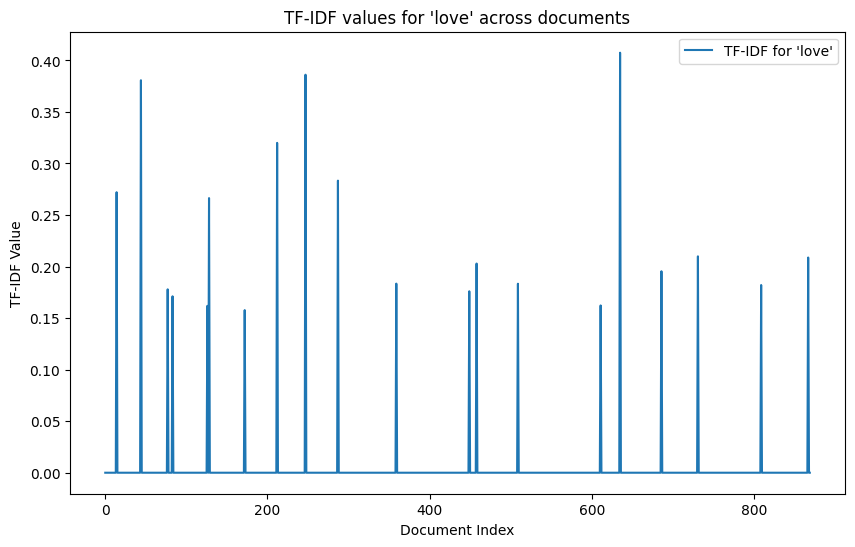

In [30]:
import pandas as pd
import numpy as np
import re
import string
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import matplotlib.pyplot as plt

# Загрузка CSV-файла
df = pd.read_csv('/content/test.csv')

# Извлекаем столбец с текстами
texts = df['text'].astype(str).tolist()

# Шаг 1: Приведение текста к нижнему регистру и удаление знаков препинания
punct_trans = str.maketrans("", "", string.punctuation)

def preprocess(text):
    text = text.lower()
    text = text.translate(punct_trans)
    text = re.sub(r"\s+", " ", text).strip()
    return text

processed_texts = [preprocess(t) for t in texts]

# Шаг 2: Токенизация (разбиение на слова)
tokenized_texts = [t.split() for t in processed_texts]

# Шаг 3: Создание словаря (слово -> id)
vocab = {}
for doc in tokenized_texts:
    for w in doc:
        if w not in vocab:
            vocab[w] = len(vocab)

# Создание обратного словаря (id -> слово)
id2word = {i: w for w, i in vocab.items()}

# Шаг 4: Преобразование текстов в векторы BoW
num_docs = len(tokenized_texts)
bow_corpus = []

for i, doc in enumerate(tokenized_texts):
    doc_bow = []
    for word in doc:
        wid = vocab[word]
        doc_bow.append((wid, 1))  # Учитываем только частоту появления слова (по умолчанию 1)
    bow_corpus.append(doc_bow)

# Шаг 5: Применение TF-IDF модели из gensim
# Создаем модель TF-IDF
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_texts]

tfidf_model = TfidfModel(corpus)
tfidf_corpus = tfidf_model[corpus]

# Преобразование векторного представления TF-IDF в плотную матрицу
tfidf_dense = np.zeros((num_docs, len(dictionary)), dtype=float)

for i, doc in enumerate(tfidf_corpus):
    for wid, value in doc:
        tfidf_dense[i, wid] = value

# Шаг 6: Проанализируем веса TF, DF, IDF, и TF-IDF
# TF (Term Frequency) в каждом документе (просто создаем матрицу с числами из BoW)
tf_matrix = np.zeros((num_docs, len(dictionary)), dtype=float)

for i, doc in enumerate(bow_corpus):
    for wid, count in doc:
        tf_matrix[i, wid] = count

# DF (Document Frequency) - сколько документов содержат каждое слово
df_vector = np.sum(tf_matrix > 0, axis=0)

# IDF (Inverse Document Frequency) - логарифм от (N / (DF + 1)) + 1
N = num_docs
idf_vector = np.log(N / (df_vector + 1)) + 1

# Считаем вручную TF-IDF
tfidf_manual = tf_matrix * idf_vector

# Сохраняем результат в DataFrame для последующего анализа и сохранения в CSV
rows = []
for wid in range(len(dictionary)):
    word = dictionary[wid]
    row = {
        "word": word,
        "df": df_vector[wid],
        "idf": idf_vector[wid],
        "tf_total": tf_matrix[:, wid].sum(),
    }
    for doc_id in range(num_docs):
        row[f"tf_doc{doc_id+1}"] = tf_matrix[doc_id, wid]
        row[f"tfidf_doc{doc_id+1}"] = tfidf_manual[doc_id, wid]
    rows.append(row)

# Преобразуем в DataFrame и сохраняем в CSV
tfidf_df = pd.DataFrame(rows)

# Путь для сохранения CSV
output_path = '/content/tfidf_results.csv'
tfidf_df.to_csv(output_path, index=False)

# Выводим первые несколько строк для проверки
print(f"TF-IDF components saved to {output_path}")
print(tfidf_df.head())

# Шаг 7: Визуализация - график распределения TF-IDF по документам
word_to_visualize = "love"  # Например, слово "love"
if word_to_visualize in dictionary.token2id:
    word_id = dictionary.token2id[word_to_visualize]
    tfidf_values = tfidf_dense[:, word_id]
    plt.figure(figsize=(10, 6))
    plt.plot(tfidf_values, label=f"TF-IDF for '{word_to_visualize}'")
    plt.title(f"TF-IDF values for '{word_to_visualize}' across documents")
    plt.xlabel("Document Index")
    plt.ylabel("TF-IDF Value")
    plt.legend()
    plt.show()

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

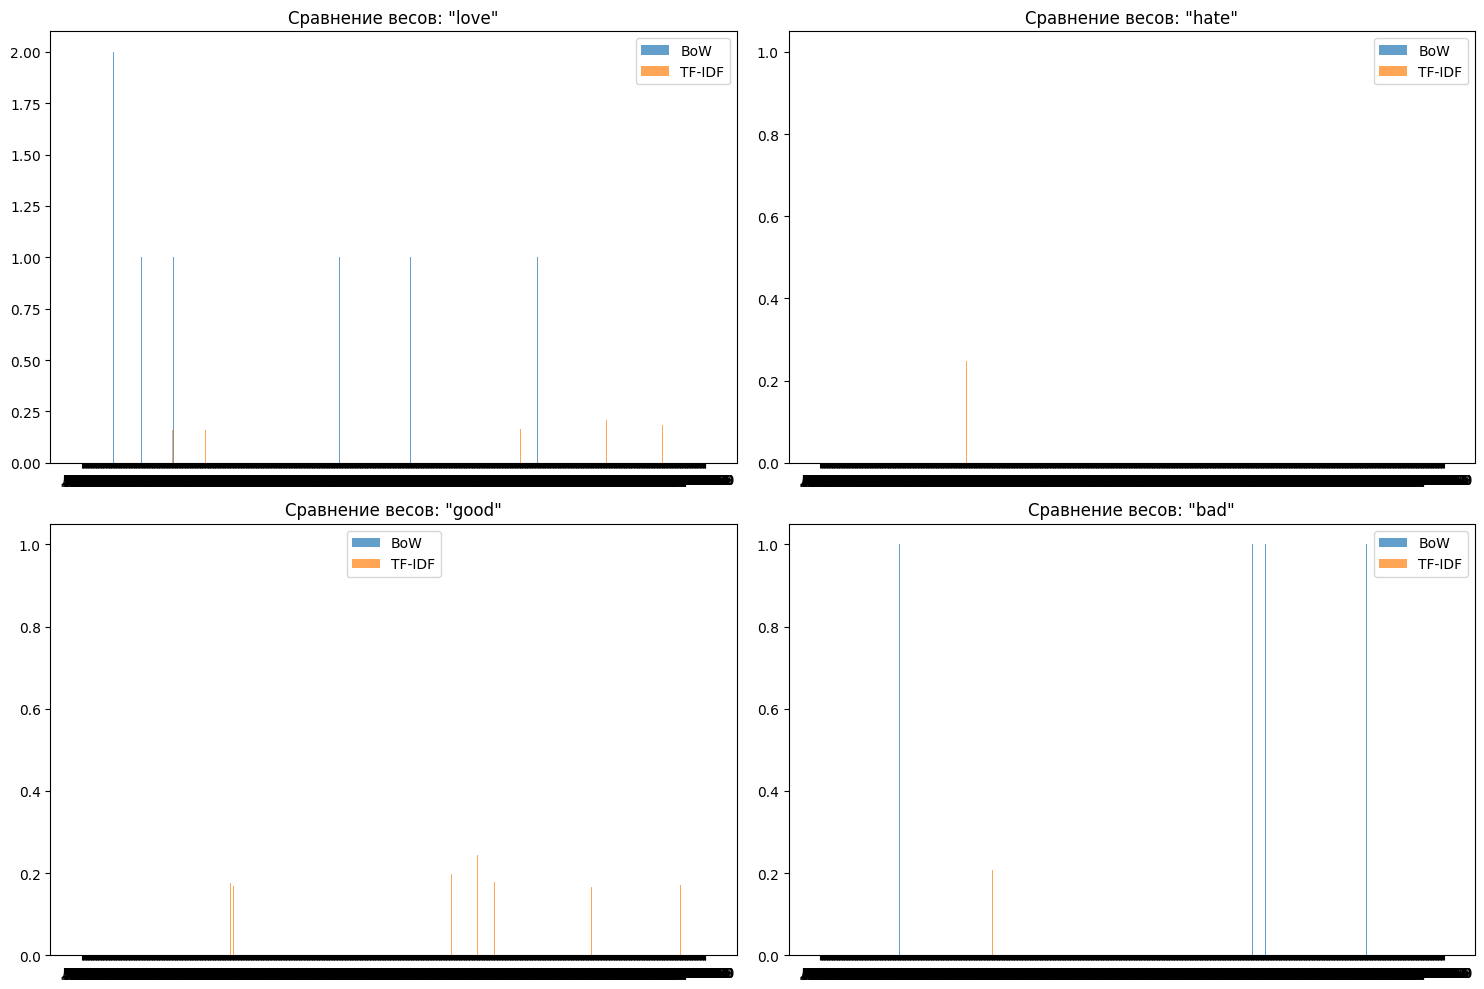

In [31]:
import matplotlib.pyplot as plt

# Функция для сравнения весов BoW и TF-IDF для нескольких слов
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # создаем 2x2 сетку для графиков

    for i, word in enumerate(words):
        row, col = i // 2, i % 2  # определяем позицию в сетке
        word_id = dictionary.token2id[word]

        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]

        # Индексы документов
        x = range(len(bow_dense))

        # Столбчатая диаграмма для BoW и TF-IDF
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)

        # Заголовок и подписи
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])

    plt.tight_layout()  # Подгоняем расположение графиков
    plt.show()

# Пример вызова функции с выбором слов для сравнения
words_to_compare = ['love', 'hate', 'good', 'bad']  # Пример слов для сравнения (выберите подходящие)
compare_bow_tfidf(words_to_compare, bow_dense, tfidf_dense, dictionary)


##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```